# <u> Diabetes Prediction Model </u>
 
 this model will predict whether the person will get diabetes or not based on the certain aspects like BMI, Pregnancies, Blood Pressure, etc. this project is made using concepts of machine learning and data science. 
 the dataset used in this model has been collected by “National Institute of Diabetes and Digestive and Kidney Diseases” and was downloaded from kaggle under the topic prima indian diabetes database. this data belongs to females above the age of 21 years.
 
 
 
 ### Libraries used:
      1 pandas - to read our data in cvs format and also analyze it. data maupulation is also possible through this library.
      2 numpy - it is used for scientific computing. here I have used for transformation or storing arrays. 
      3 seaborn and matplotlib - they are used for visualization of the data (various forms of graphs)
      4 sklearn - it is used to import logistic regression algorythm and test the data.
      5 joblib - it is used for saving the model for later use.  
      


In [3]:
pip install nbopen

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.externals import joblib

## The colums considered in the data set are(information as provided by the prima india diabetes dataset) :

    1. Pregnancies - Number of times pregnant
    2. Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    3. Blood Pressure - Diastolic blood pressure (mm Hg)
    4. Skin Thickness - Triceps skin fold thickness (mm)
    5. Insulin - 2-Hour serum insulin (mu U/ml)
    6. BMI - Body mass index (weight in kg/(height in m)^2)
    7. Diabetes - Pedigree Function - Diabetes pedigree function
    8. Age - Age (years)
    9. Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0

# Data Description :

In [2]:
#the read function is used to load the .cvs file in the running notebook
df = pd.read_csv('diabetes.csv')
#to display the database
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
#the information function, as the name suggets provides us information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB



#####  From the above information we see that there are no null values present in the datase which is a good sign. this means that our data is already clean. This function provides us with a clear amount of memory used and data type of the data in the database.  Lets find out the total number of entries in the dataset.  



In [4]:
#to find the dimentions for the dataset
df.shape

(768, 9)

In [27]:
# to print the number of zero values in the dataset
print("total number of rows : {0}".format(len(df)))
print("number of rows missing Age: {0}".format(len(df.loc[df['Age'] == 0])))
print("number of rows missing BMI: {0}".format(len(df.loc[df['BMI'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("number of rows missing Pregnancies: {0}".format(len(df.loc[df['Pregnancies'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("number of rows missing Glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))

total number of rows : 768
number of rows missing Age: 0
number of rows missing BMI: 11
number of rows missing BloodPressure: 35
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Insulin: 374
number of rows missing Pregnancies: 111
number of rows missing SkinThickness: 227
number of rows missing Glucose: 5


In [5]:
#describe function is used to provide more detailed information about the dataset. 
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### From the above description provided it is safe to conclude that the average pregnancies in the data set is 3-4. the average glocose is at 120 whereas the BMI rate stands at 31.99. the outcome column however shows a rather good result as it indicatesthat on an average people dont get diabetes. 

In [25]:
#isnull() function is used to find any null entries in the data set this is a part of data preparation. 
#the sum() function will give a total sum at the end.
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Exploration and Visualization :

Here we analyse how many times each value occurss in each coloumns. the graph shown below is in the form of a histogram from the pandas library.  

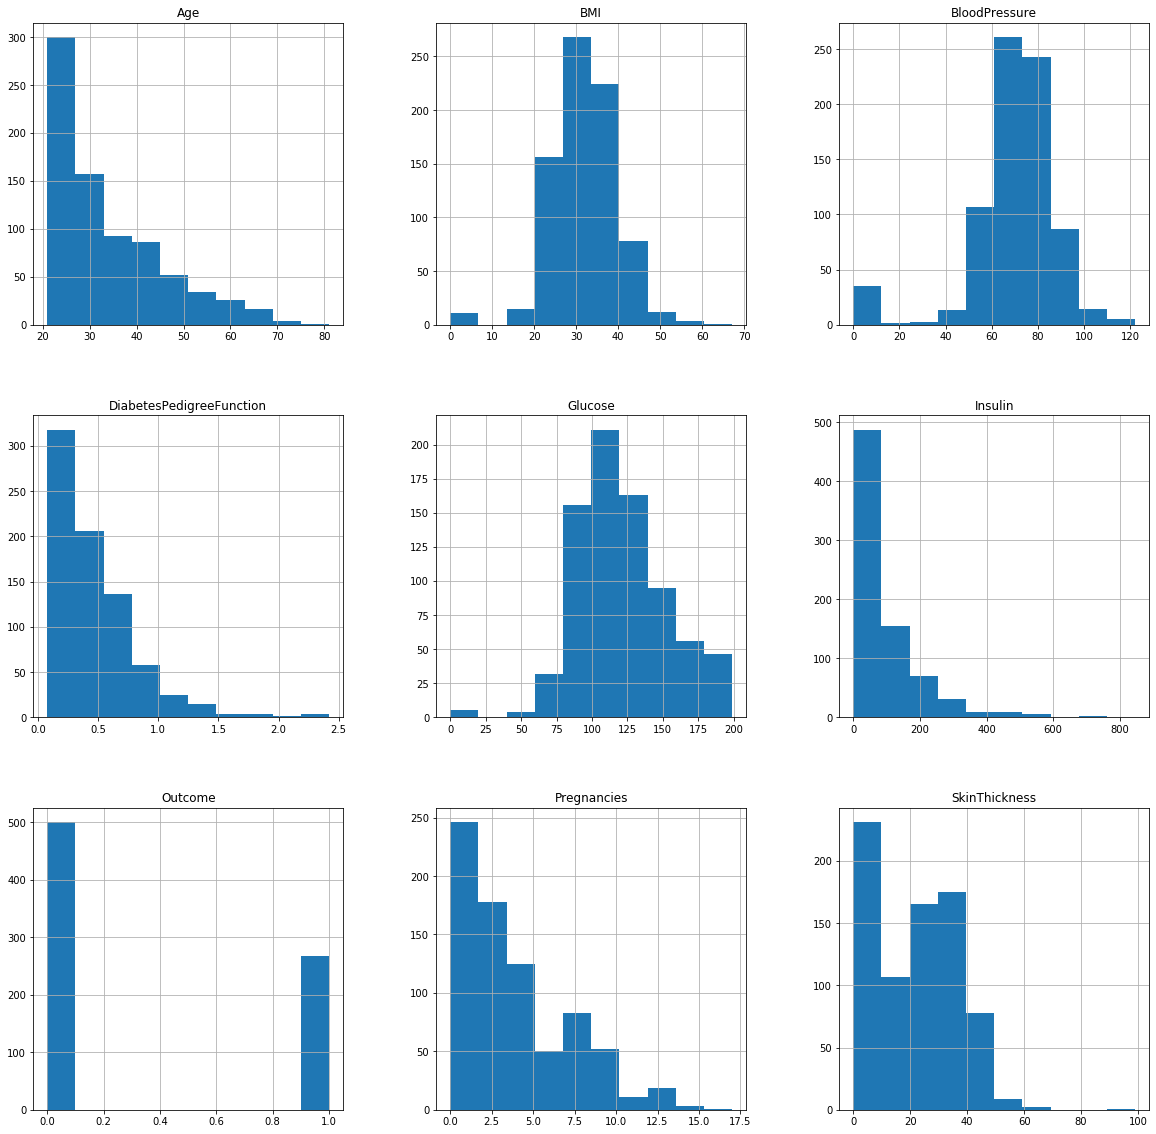

In [26]:
#to sketch the graph for each column individually. 
p = df.hist(figsize = (20,20))

The visual data helps us clear our doubts and builds a clear picture in the mind. 

### Building a corelation between the entries of the columns 

building a corelation is a very interesting and crucial aspect of analysing the data. the corelation is built through corr() function with the help of the seaborn library. This corelation will help us know which factors contribute in accelerating the chances of getting diabetic.

In [8]:
#function to show corelation between each column entry
corr = df.corr()
print(corr)


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

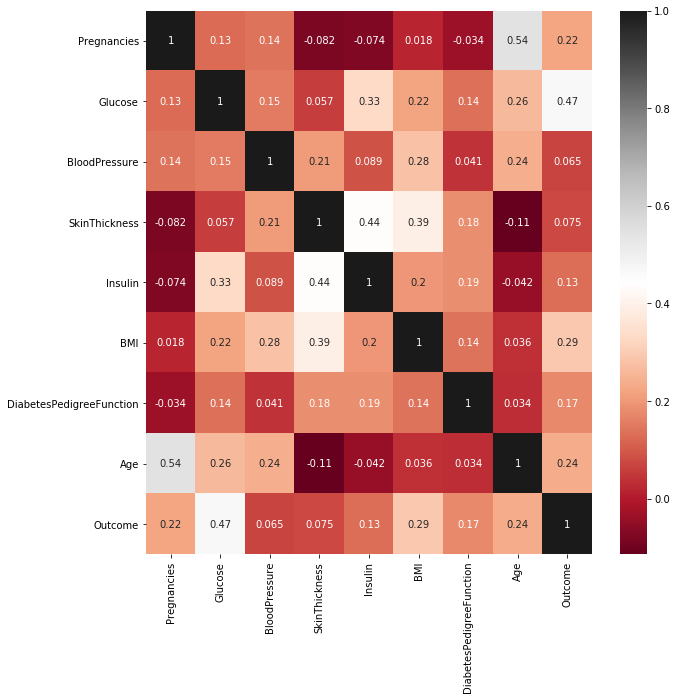

In [9]:
# the concept of heat map is used to build the corelation visually. this helps the observer understand better. 
#seaborn library has been used for the visualization
top_corr_features = corr.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdGy")

From the above heat map it is clear that the Glocose, BMI, Age and preganancies are the hieghest factors which contribute in making a person diabetic whereas Blood pressure is only 0.065 percent related to a person being diabetic. 

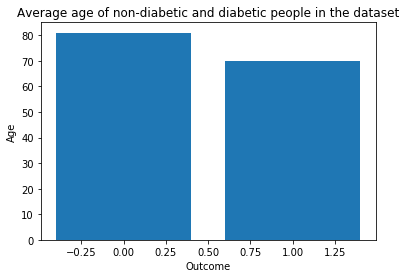

In [10]:
#bar graph has been used to show a relation between the age and the frequency of the outcome of a patient to be diabetic.
plt.bar(df['Outcome'], df['Age'])

plt.xlabel('Outcome')
plt.ylabel('Age')
plt.title('Average age of non-diabetic and diabetic people in the dataset')
plt.show()

Above is the demonstration of the relation between the age and the diabetes outcome. This data clearly shows that the females ages between 65-70 years are more likely to be diabetic.


# Dataset Preparation:
 
 ## Splitting of data into datasets


for a machine learning algorithm to work properly, we split the data into 3 parts, namely — training set, development set and test set. 

The data set consists of record of 768 patients in total. To train our model we will be using 650 records. We will be using 100 records for testing, and the last 17 records to cross check our model.

In [11]:
#Total 768 patients record
#Using 650 data for training
#Using 100 data for testing
#Using 18 data for checking

dfTrain = df[:650]
dfTest = df[650:750]
dfCheck = df[750:]

now separate the label and features(for both training and test dataset). feature has been classified as the inout and lable as the output (i.e, where the outcome would be 1 or 0) In addition to that, we will also convert them into arrays because the machine learning algorithm process data in NumPy array format.


In [12]:
#Separating label and features and converting to numpy array to feed into our model
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))

# Data Normalization:


This mmethod is used to reduce data redundancy and improve the data integrity. in other words, it removes the unwanted data. 
To calculate the same we subtract the mena from the value and then divite by standard deviation  

In [14]:
# trainData, axis=0 just means to check that the new mean should be equal to 0 in the training data array
# trainData, axis=0 justmeans to check that the new standard deviation should be equal 1 in the training data array.
mean = np.mean(trainData, axis=0)
std = np.std(trainData, axis=0)
 
trainData = (trainData - mean)/std
testData = (testData - mean)/std
 


# Training and Evaluating the Machine Learning Model:

We can now train our classification model. We’ll be using a machine simple learning model called logistic regression. Since the model is readily available in sklearn, the training process is quite easy. First, we create an instance called diabetesCheck and then use the fit() function to train the model.

In [15]:
#to call logidstic regression algorythm
diabeteslr = LogisticRegression()
#to train the datsa for the model to predict
diabeteslr.fit(trainData, trainLabel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
#score() function is used to formulate the accuracy of the model. 
#two arrays testdata and lable has been taken in as parameters
accuracy = diabeteslr.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  78.0 %


Now that we have read the accuracy of the model, now the model is ready. one can analyse even more things from this data such as which feature has a highter importance in then terms of the patient being diabetic.

        Features  importance
0    Pregnancies    0.443950
1        Glucose    1.054851
2  BloodPressure   -0.242761
3  SkinThickness   -0.006363
4        Insulin   -0.102982


Text(0.5, 0, 'Importance')

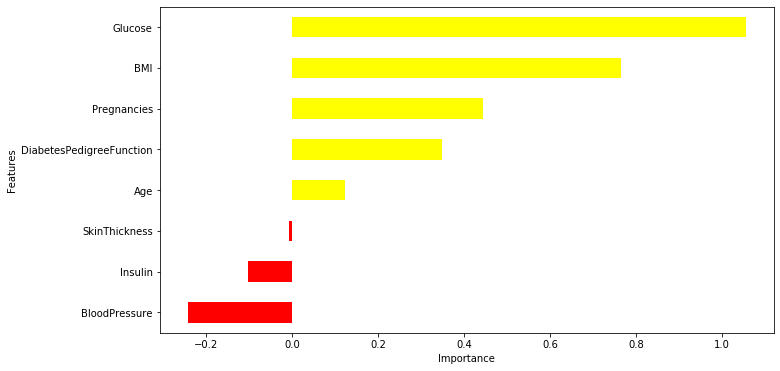

In [17]:
#Using regression.coef lets one have a list of coefficients,
#but not their corresponding features which has been stored in the form of a list
coeff = list(diabeteslr.coef_[0])
labels = list(dfTrain.drop('Outcome',1).columns)
#adding a column features in the datafile
features = pd.DataFrame()
features['Features'] = labels
#the value in the list has been transfered to the "importance" factor.
features['importance'] = coeff
print(features.head())
#features are sorted by their values above 0 and below 
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'yellow', False: 'red'}))
plt.xlabel('Importance')

The abpove shown graph clearly mentions that Glucose is the factor that has the hieghest importance, even more that BMI in contributio towards diabetes. in other words more the Glucose level in you body more likely one is to gettimg diabetic however blood pressure and insulin are least importance that means they are related to each other inversely. and note that blood pressure has greater negative value than insulin. 

# Saving the Model :

In [18]:
# the dump function is used to save the model it basically means to drop the file and save it in pickle fromat. 
# One wont be able to understand the material inside the pickle file
joblib.dump([diabeteslr, mean, std], 'diabeteseModel.pkl')

['diabeteseModel.pkl']

this model will be saved in the same folder as this file and the database file. 

at this moment the accuracy of this model stands at 78%, which is considered not very bad


In [19]:
#to check whether the model has been saved or not and to check the accuracy of the model we use the load function
#and the csocr efunction through joblib library
diabetesLoadedModel, mean, std = joblib.load('diabeteseModel.pkl')
accuracyModel = diabetesLoadedModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  78.0 %


# Making the prediction:

In [20]:
#print the predicted values from the check dataset
print(dfCheck.head())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
750            4      136             70              0        0  31.2   
751            1      121             78             39       74  39.0   
752            3      108             62             24        0  26.0   
753            0      181             88             44      510  43.3   
754            8      154             78             32        0  32.4   

     DiabetesPedigreeFunction  Age  Outcome  
750                     1.182   22        1  
751                     0.261   28        0  
752                     0.223   25        0  
753                     0.222   26        1  
754                     0.443   45        1  


In [22]:
sampleData = dfCheck[:1]

# prepare sample
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures = (sampleDataFeatures - mean)/std

# predict_proba () function has been used to perform the probability function on the
# model and saved in the variable prediction
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[0.44077634 0.55922366]]
prediction: [1]


# Summarizing:

The analysis fro the above data tells us that :
    1. Pregnancies, Glucose level, Age and BMI are the greatest factors in females aged more than 21 which contribute in bein diabetic. 
    2. Glucose is the factor that has the hieghest importance, even more that BMI in contributio towards diabetes. in other words more the Glucose level in you body more likely one is to gettimg diabetic however blood pressure and insulin are least importance.
    3. the model in overall relies on BMI, even though Age and glucose appeared to be the leading factors.

# Thank You !